In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set up Working directory - Directory/Folder Path
import io
%cd "/Users/rajeshprabhakarkaila/Desktop/Hackathon/HousePrice Prediction"

/Users/rajeshprabhakarkaila/Desktop/Hackathon/HousePrice Prediction


In [3]:
# Train file is complete data including dependent variable which used for building models
# Test file will not have dependent variable which needs to be predicted using train model

In [4]:
housetrain=pd.read_csv("train.csv")

In [5]:
housetest=pd.read_csv("test.csv")

In [6]:
housetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
# For preprocessing combine both train and test into single dataframe
# For Row Concatenation number of columns and sequence of columns must be exactly same

In [9]:
# Add Dependent variable to test data & fill it with word "test"
housetest['SalePrice']="test"

In [10]:
# Row Concatenation - Top rows train data and bottom rows test data
combinedf=pd.concat([housetrain,housetest],axis=0) # axis=0 is Row Concatenation

In [11]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [12]:
# Split Data into numeric and object cols
numcols=combinedf.select_dtypes(include=np.number)
objcols=combinedf.select_dtypes(include=['object'])

In [13]:
# Check for Missing Values
objcols.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Electrical          1
SaleType            1
Exterior1st         1
KitchenQual         1
RoofStyle           0
Neighborhood        0
SaleCondition       0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
LandSlope           0
Condition1          0
HouseStyle          0
Condition2          0
Foundation          0
RoofMatl            0
Street              0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
SalePrice           0
dtype: int64

In [14]:
# Impute Missing Values with Word "Not Available"
for col in objcols.columns:
    objcols[col]=objcols[col].fillna("Not Available")

In [15]:
# Seperate Categorical Cols from Numcols
catcols=numcols[['OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd','GarageYrBlt',
                 'MoSold', 'YrSold']]

In [16]:
# Drop Category cols from numcols
numcols=numcols.drop(['OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd','GarageYrBlt',
                 'MoSold', 'YrSold'],axis=1)

In [17]:
numcols.isnull().sum().sort_values(ascending=False)

LotFrontage      486
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
GarageCars         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageArea         1
Id                 0
WoodDeckSF         0
ScreenPorch        0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
TotRmsAbvGrd       0
PoolArea           0
Fireplaces         0
FullBath           0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
LotArea            0
MiscVal            0
dtype: int64

In [18]:
# Impute with Median
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].median())

In [19]:
catcols.isnull().sum()

OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
GarageYrBlt     159
MoSold            0
YrSold            0
dtype: int64

In [20]:
# Mode or Most Frequent Class Imputation
for col in catcols.columns:
    catcols[col]=catcols[col].fillna(catcols[col].value_counts().idxmax())

In [21]:
# Standard Scaler on numcols
from sklearn.preprocessing import StandardScaler

In [22]:
numcols['SalePrice']=objcols['SalePrice'] # Move SalePrice to numcols

In [23]:
numcols_scaled=StandardScaler().fit_transform(numcols.drop('SalePrice',axis=1))

In [24]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.drop('SalePrice',axis=1).columns)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
objcols=objcols.drop('SalePrice',axis=1) # Drop SalePrice from objcols

In [27]:
objcols_encode=objcols.apply(LabelEncoder().fit_transform) # LabelEncode

In [28]:
catcols_encode=catcols.apply(LabelEncoder().fit_transform) # LabelEncode

In [29]:
numcols_scaled=numcols_scaled.reset_index()
objcols_encode=objcols_encode.reset_index()
catcols_encode=catcols_encode.reset_index()

In [30]:
# Concatenate all 3 dataframes into one dataframe
combinedf_final=pd.concat([numcols_scaled,objcols_encode,catcols_encode],axis=1)

In [31]:
combinedf=combinedf.reset_index()

In [32]:
combinedf_final['SalePrice']=combinedf['SalePrice']

In [33]:
#Split data into train and test
housetrain_df=combinedf_final[combinedf_final['SalePrice']!="test"]
housetest_df=combinedf_final[combinedf_final['SalePrice']=="test"]

In [34]:
housetrain_df=housetrain_df.drop('index',axis=1)

In [35]:
housetest_df=housetest_df.drop('index',axis=1)

In [36]:
housetest_df=housetest_df.drop('SalePrice',axis=1)

In [37]:
# Split Data into dependent variable & Independent Variables
y=housetrain_df['SalePrice']
X=housetrain_df.drop(['Id','SalePrice'],axis=1)

In [38]:
housetest_df=housetest_df.drop('Id',axis=1)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
regmodel=LinearRegression().fit(X,y)

In [41]:
regmodel.score(X,y)

0.8512688844477176

In [42]:
reg_test_pred=regmodel.predict(housetest_df)

In [43]:
pd.DataFrame(reg_test_pred).to_csv("mlr.csv")

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
treemodel=DecisionTreeRegressor().fit(X,y)

In [46]:
treemodel.score(X,y)

1.0

In [47]:
tree_predict=treemodel.predict(housetest_df)

In [48]:
pd.DataFrame(tree_predict).to_csv("treemodel.csv")

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
RFmodel=RandomForestRegressor(n_estimators=3000).fit(X,y)

In [51]:
RFmodel.score(X,y)

0.9819264794771647

In [52]:
RF_test=RFmodel.predict(housetest_df)

In [53]:
pd.DataFrame(RF_test).to_csv("RFmodel.csv")

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
gbm=GradientBoostingRegressor(n_estimators=3000).fit(X,y)

In [56]:
gbm.score(X,y)

0.9999642759905216

In [57]:
gbm_test=gbm.predict(housetest_df)

In [58]:
pd.DataFrame(gbm_test).to_csv("gbmmodel.csv")

In [118]:
from sklearn.linear_model import Lasso

In [152]:
lasso=Lasso(alpha=30,max_iter=10000).fit(X,y)

In [154]:
lasso.score(X,y)

0.8509219707906792

In [156]:
lasso_predict=lasso.predict(housetest_df)

In [158]:
from sklearn.linear_model import Ridge

In [160]:
ridge=Ridge(alpha=10).fit(X,y)

In [162]:
ridge.score(X,y)

0.8487093014422826

In [167]:
# Support Vector Machines(SVM) is both a regression and classification algorithm
# Predominanlty used in Classification
# SVM will draw a linear seperator on hyperplane between 2 classes such that both classes 
# are distinctly seperated.
# SVM also draws 2 support vectors touching closest observations on both sides of linear
# seperator.
# SVM tries to maximize the margin of distance between support vectors and rightside of
# optimal hyperplane is positive class and left side is negative class. 

# SVM assumes linearity but in realtime data is not linearly seperable. Most of time data
# is non linear.
# Kernel function is a mathemtical technique to map non linear separable data into higher
# dimensional space where it becomes linearly seperable without actually computing 
# transformation. Dot Product is used in kernel transformation

# most used kernel function is Radial Basis Function (RBF Kernel) using Gaussian function
# maps into infinite dimension shape

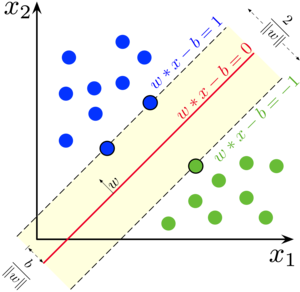
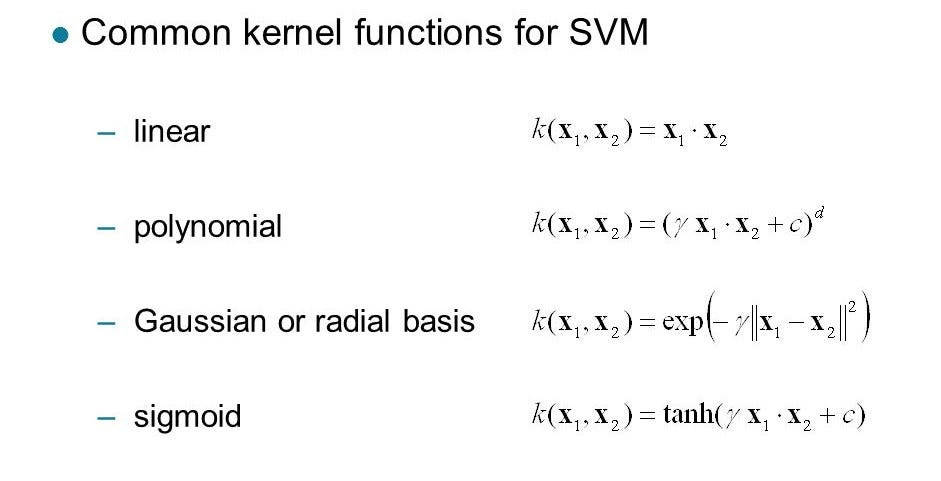

In [176]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [182]:
svm_model=SVR(kernel="rbf")

In [202]:
param_grid = {
    'C': [0.1, 1, 10],  # Regularization Parameter
    'epsilon': [0.01, 0.1, 1], # Margin of tolerance
    'gamma': ['scale', 'auto'] # kernel coefficient
}

In [220]:
grid_search=GridSearchCV(svm_model,param_grid,scoring="r2",cv=5,
                         verbose=1,n_jobs=-1)

In [222]:
grid_search.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1],
                         'gamma': ['scale', 'auto']},
             scoring='r2', verbose=1)

In [224]:
grid_search.best_estimator_

SVR(C=10, epsilon=0.01)

In [226]:
grid_search.best_score_

-0.03814582264913091